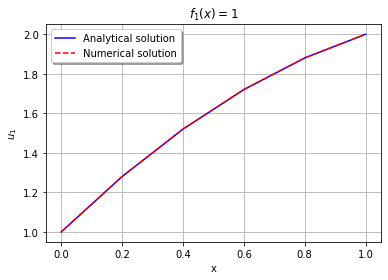

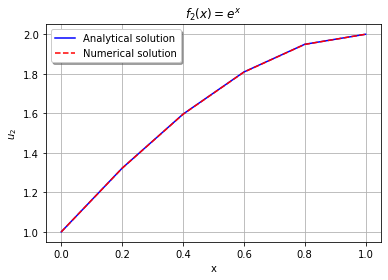

Gobal error of f1 is: 1.719950113979703e-16
Gobal error of f2 is: 0.0005132280521659377


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def FDL1D(N,L):  #construct finite difference laplacian operator 1 D
    FDL1 = -1*np.ones(N-2)
    FDL0 = 2*np.ones(N-1)
    matrix =(1/(L/N)**2)*(np.diag(FDL1,k =1)+np.diag(FDL0,k=0)+np.diag(FDL1,k =-1))
    return matrix 


#############################################3(b)(c):f = 1#############################################
#initialization
N = 5
h= 1/N 
x = np.linspace(0,1,N+1)

#solve numerical matrix
L1 = FDL1D(N,1)
def construct_f1(N,h):
    x = np.linspace(0,1,N+1)
    RHS2 = np.ones((N-1))
    RHS2[0] = RHS2[0]+1/h**2    #BC
    RHS2[len(RHS2)-1] = RHS2[len(RHS2)-1]+2/h**2   #BC
    return RHS2 
f1 = construct_f1(N,h)
u1_num = np.linalg.solve(L1,f1)

#including BC
u1_num = np.insert(u1_num,N-1,2)
u1_num = np.insert(u1_num,0,1)
# print("Numerical solution is: "+str(u1_num))

#analytical solution
def anal1(N,D):
    x = np.linspace(0,1,N+1)
    u1_anal = -0.5*x**2+1.5*x+1
    return u1_anal
u1_anal = anal1(N,1)
# print("Analytical solution is: "+str(u2_anal))

#plot figure
plt.xlabel("x")
plt.ylabel("$u_1$")
plt.title("$f_1(x) = 1$" )
plt.plot(x, u1_anal, 'b-',label="Analytical solution")
plt.plot(x, u1_num, 'r--',label = "Numerical solution") 
plt.legend(loc="best",shadow=True)
plt.grid()
plt.show()
plt.close()


#############################################3(c)f = e^x#############################################
#funtion construct f
def construct_f2(N,h):
    x = np.linspace(0,1,N+1)
    RHS2 = np.exp(x)
    RHS2 =  np.delete(RHS2, [0,len(x)-1])
    RHS2[0] = RHS2[0]+1/h**2    #BC
    RHS2[len(RHS2)-1] = RHS2[len(RHS2)-1]+2/h**2   #BC
    return RHS2

    
#solve numerical matrix
L2 = FDL1D(N,1) 
f2 = construct_f2(N,h)
u2_num = np.linalg.solve(L2,f2)

#including BC
u2_num = np.insert(u2_num,0,1)
u2_num = np.insert(u2_num,N,2)
# print("Numerical solution is: "+str(u2_num))

#analytical solution
def anal2(N,D):
    x = np.linspace(0,D,N+1)
    u2_anal = -np.exp(x)+np.exp(1)*x+2
    return u2_anal
u2_anal = anal2(N,1)
# print("Analytical solution is: "+str(u2_anal))

#plot figure
plt.xlabel("x")
plt.ylabel("$u_2$")
plt.title("$f_2(x) = e^x $")
plt.plot(x, u2_anal, 'b-',label="Analytical solution")
plt.plot(x, u2_num, 'r--',label = "Numerical solution") 
plt.legend(loc="best",shadow=True)
plt.grid()
plt.show()
plt.close()

#error_f get e2h
def error_f(u_anal,u_num,h):
    e = u_anal-u_num
    e = np.delete(e, [0,len(u_anal)-1])
    e_norm = np.linalg.norm(e)
    e2h = e_norm*np.sqrt(h)
    return e2h
  
er1 = error_f(u1_anal,u1_num,1/N)
er2 = error_f(u2_anal,u2_num,1/N)
print("Gobal error of f1 is: "+ str(er1))
print("Gobal error of f2 is: "+ str(er2))

In [0]:
#############################################3(d)#############################################
#initialization
nr_step = 10   #this nr gives how many steps computed for k
k = np.arange(0,nr_step)
h_k = 0.2/2**k        #the step size
N_k = 1/h_k           #grid number -1
N_k = N_k.astype(int) #convert into int
u2_num_k = []         #store analtical solution for different k
u2_anal_k = []
u1_num_k = []
u1_anal_k = []
e2h_k_2 = []       #store error
e2h_k_1 = []

#solve solution and save data
for i in range(len(k)):
    L2_k = FDL1D(N_k[i],1) 
    f2_k = construct_f2(N_k[i],h_k[i]) #construct f2_k   
    u2_num_k.append(np.linalg.solve(L2_k,f2_k))#numerical solution   
    L1_k = FDL1D(N_k[i],1) 
    f1_k = construct_f1(N_k[i],h_k[i]) #construct f2_k   
    u1_num_k.append(np.linalg.solve(L1_k,f1_k))#numerical solution
#Analytical solution
    u2_anal_k.append(anal2(N_k[i],1)) #call funtion solve analytical solution
    u1_anal_k.append(anal1(N_k[i],1)) #call funtion solve analytical solution
# print(u2_anal_k)

#including BC
for i in range(len(k)):
    u2_num_k[i] = np.insert(u2_num_k[i], 0, 1)
    u2_num_k[i] = np.insert(u2_num_k[i], N_k[i], 2)
    u1_num_k[i] = np.insert(u1_num_k[i], 0, 1)
    u1_num_k[i] = np.insert(u1_num_k[i], N_k[i], 2)
# print(u2_num_k)
# print(u1_num_k)

#error estimation
    e2h_k_2.append(error_f(u2_anal_k[i],u2_num_k[i],h_k[i]))#call function compare error
    e2h_k_1.append(error_f(u1_anal_k[i],u1_num_k[i],h_k[i]))#call function compare error
# print(e2h_k_2)

# The ratio between refine mesh
ratio1 = np.zeros(len(k)-1)
ratio2 = np.zeros(len(k)-1)
for i in range(len(k)-1):
    ratio1[i] = e2h_k_1[i]/e2h_k_1[i+1]
    ratio2[i] = e2h_k_2[i]/e2h_k_2[i+1]
print("The ratio 1 is "+str(ratio1))
print("The ratio 2 is "+str(ratio2))

The ratio 1 is [0.4330127  0.58345997 0.49380074 0.33086898 0.40682889 0.55345465
 0.07072968 0.40644622 0.81705384]
The ratio 2 is [3.99043765 3.9982759  3.99961097 3.99990536 3.99997643 3.99999478
 3.99996386 3.99969508 3.99885262]


In [0]:
#############################################3.(d)bonus_fitting cruve only for uniform mesh#############################################
def f(h, C, alpha):
    return C*h**alpha

#fir for f2
params, extras = curve_fit(f,h_k,e2h_k_2)
C_u2 = params[0]
alpha_u2 = params[1]

#fit for f1
params1, extras1 = curve_fit(f,h_k,e2h_k_1)
C_u1 = params1[0]
alpha_u1 = params1[1]

[[ 36. -24.  -0.  -0.]
 [-36.  72. -36.  -0.]
 [ -0. -36.  72. -36.]
 [ -0.  -0. -36.  72.]]
[13.39561243  1.64872127  1.94773404 74.30097589]
[13.  1.  1. 73.]
Numerical solution for f2 is: [1.         1.51403965 1.71290896 1.86598045 1.96494823 2.        ]
Numerical solution for f1 is: [1.         1.44444444 1.625      1.77777778 1.90277778 2.        ]
Analytical solution for f2 is: [1.         1.51048152 1.71041964 1.86445384 1.96425897 2.        ]
Analytical solution for f1 is: [1.         1.44444444 1.625      1.77777778 1.90277778 2.        ]


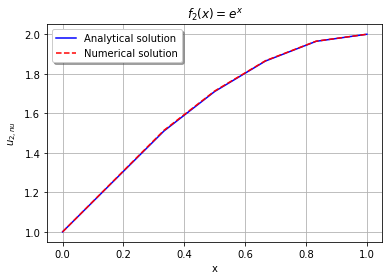

0.002081471657458716

In [0]:
############################################# 3(e): nonuniform grid############################################# 
#building the matrix 
#func return nu L
def nu_FDL1D(N,L):
    FDL1 = 1*np.ones(N-2)
    FDL0 = -2*np.ones(N-1)
    matrix =(np.diag(FDL1,k =1)+np.diag(FDL0,k=0)+np.diag(FDL1,k =-1))
    matrix [0,0] = -1
    matrix[0,1]= 2/3
    matrix = -(1/(L/(N+1))**2)*matrix
    return matrix 
L2_nu = nu_FDL1D(N,1)

#func return nu f2
def nu_f2(N,D):
    h = 1/(N+1)
    x = np.linspace(0,1,N+2)
    f2_nu = np.exp(x)
    f2_nu = np.delete(f2_nu,0)
    f2_nu = np.delete(f2_nu,0)
    f2_nu = np.delete(f2_nu,N-1)
    f2_nu[0] = f2_nu[0] + 1/(3*h**2)
    f2_nu[N-2] = f2_nu[N-2]+2/h**2
    return f2_nu
f2_nu  = nu_f2(N,1)
print(L2_nu)
print(f2_nu)
u2_num_nu = np.linalg.solve(L2_nu,f2_nu)

#func return nu f1
def nu_f1(N,D):
    h = 1/(N+1)
    f2_nu = np.ones(N+2)
    f2_nu = np.delete(f2_nu,0)
    f2_nu = np.delete(f2_nu,0)
    f2_nu = np.delete(f2_nu,N-1)
    f2_nu[0] = f2_nu[0] + 1/(3*h**2)
    f2_nu[N-2] = f2_nu[N-2]+2/h**2
    return f2_nu 
f1_nu  = nu_f1(N,1)
print(f1_nu)
u1_num_nu = np.linalg.solve(L2_nu,f1_nu)

#including BC f2
u2_num_nu = np.insert(u2_num_nu,N-1,2)
u2_num_nu = np.insert(u2_num_nu,0,1)
print("Numerical solution for f2 is: "+str(u2_num_nu))

#including BC for f1
u1_num_nu = np.insert(u1_num_nu,N-1,2)
u1_num_nu = np.insert(u1_num_nu,0,1)
print("Numerical solution for f1 is: "+str(u1_num_nu))

#analytical solution for f2
def nu_anal2(N,D):
    x_nu = np.linspace(0,1,N+2)
    u2_anal_nu =  -np.exp(x_nu)+np.exp(1)*x_nu+2
    x_nu = np.delete(x_nu,1)
    u2_anal_nu = np.delete(u2_anal_nu,1)
    return u2_anal_nu,x_nu
u2_anal_nu = nu_anal2(N,1)[0]
x_nu = nu_anal2(N,1)[1]
print("Analytical solution for f2 is: "+str(u2_anal_nu))

#analytical solution for f1
def nu_anal1(N,D):
    x_nu = np.linspace(0,1,N+2)
    u1_anal_nu =  -0.5*x_nu**2+1.5*x_nu+1
    x_nu = np.delete(x_nu,1)
    u1_anal_nu = np.delete(u1_anal_nu,1)
    return u1_anal_nu,x_nu
u1_anal_nu = nu_anal1(N,1)[0]
x_nu = nu_anal1(N,1)[1]
print("Analytical solution for f1 is: "+str(u1_anal_nu))

#print figure nonuniform mesh only for f2
plt.xlabel("x")
plt.ylabel("$u_{2,nu}$")
plt.title("$f_2(x) = e^x$")
plt.plot(x_nu, u2_anal_nu, 'b-',label="Analytical solution")
plt.plot(x_nu, u2_num_nu, 'r--',label = "Numerical solution") 
plt.legend(loc="best",shadow=True)
plt.grid()
plt.show()
plt.close()

In [0]:
############################################# 3(e) muti-steps case ############################################# 
#initialization
k = np.arange(0,nr_step)
N_k_nu = 5*2**k        #grid number -1
h_k_nu = 1/(N_k_nu+1)       # the step size
u2_num_k_nu = []
u2_anal_k_nu = []
u1_num_k_nu = []
u1_anal_k_nu = []
e2h_k_nu_2 = []
e2h_k_nu_1 = []

#solve solution and store data
for i in range(len(k)):
    L2_k_nu = nu_FDL1D(N_k_nu[i],1) 
    f2_k_nu = nu_f2(N_k_nu[i],1) #construct f2_k   
    u2_num_k_nu.append(np.linalg.solve(L2_k_nu,f2_k_nu))#numerical solution
    L1_k_nu = nu_FDL1D(N_k_nu[i],1) 
    f1_k_nu = nu_f1(N_k_nu[i],1) #construct f2_k   
    u1_num_k_nu.append(np.linalg.solve(L1_k_nu,f1_k_nu))#numerical solution
#Analytical solution
    u2_anal_k_nu.append(nu_anal2(N_k_nu[i],1)[0]) #call funtion solve analytical solution
    u1_anal_k_nu.append(nu_anal1(N_k_nu[i],1)[0]) #call funtion solve analytical solution
# print(u2_num_k_nu)
# print(u2_anal_k_nu)

#including BC
for i in range(len(k)):
    u2_num_k_nu[i] = np.insert(u2_num_k_nu[i], 0, 1)
    u2_num_k_nu[i] = np.insert(u2_num_k_nu[i], N_k_nu[i], 2)
    u1_num_k_nu[i] = np.insert(u1_num_k_nu[i], 0, 1)
    u1_num_k_nu[i] = np.insert(u1_num_k_nu[i], N_k_nu[i], 2)
# print(u2_num_k_nu)
    
#error estimation
for i in range(len(k)):
    e2h_k_nu_2.append(error_f(u2_anal_k_nu[i],u2_num_k_nu[i],h_k_nu[i]))#call function compute errors  
    e2h_k_nu_1.append(error_f(u1_anal_k_nu[i],u1_num_k_nu[i],h_k_nu[i]))#call function compute errors
# print(e2h_k_nu_2)

ratio_nu = np.zeros(len(k)-1)
for i in range(len(k)-1):
    ratio_nu[i] = e2h_k_nu_2[i]/e2h_k_nu_2[i+1]
print(ratio_nu)

[6.13832111 7.9284486  7.78679272 3.85176975 3.2587179  3.5650609
 3.77590596 3.88684387 3.94196012]


In [0]:
 ############################################# 3.(e) store data for fiting curve f1 ############################################# 
def f1(h, C, alpha):
    return C*h**alpha

#do the curve fit
params, extras = curve_fit(f1,h_k,e2h_k_nu_1)
C_nu_1 = params[0]
alpha_nu_1 = params[1]


#C and alpha
print("C = %g,  \u03B1  =%g " %(C_nu_1,alpha_nu_1))


C = 7.77665e-17,  α  =-1.20451 


In [0]:
 ############################################# 3.(e) store data for fiting curve f2############################################# 
def f2(h, C, alpha):
    return C*h**alpha

#do the curve fit
params, extras = curve_fit(f2,h_k,e2h_k_nu_2)
C_nu_2 = params[0]
alpha_nu_2 = params[1]


#C and alpha
print("C = %g,  \u03B1  =%g " %(C_nu_2,alpha_nu_2))


C = 0.131928,  α  =2.63458 


[Text(0, 0.5, '$||e||_{2,h}$'), Text(0.5, 0, 'k')]

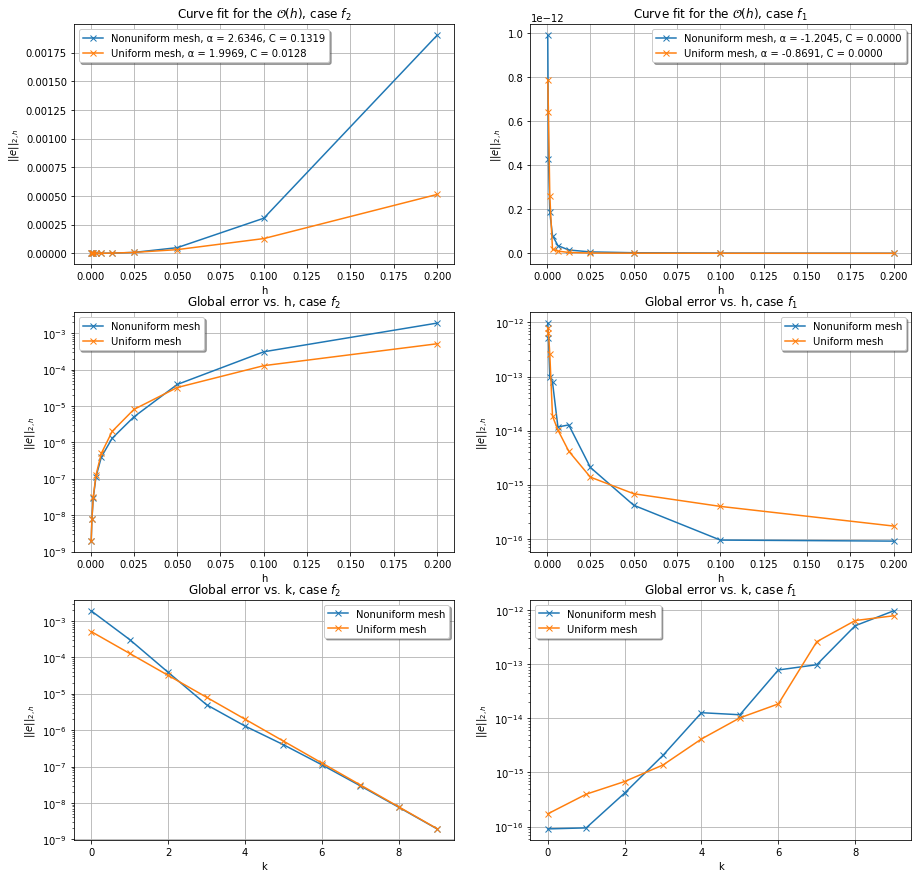

In [0]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))
axs[0,0].plot(h_k, f2(h_k,C_nu_2,alpha_nu_2),'-x', label = 'Nonuniform mesh, \u03B1 = '+str('{0:.4f}'.format(alpha_nu_2))+', C = '+str('{0:.4f}'.format(C_nu_2)))
axs[0,0].plot(h_k, e2h_k_2,'-x', label = 'Uniform mesh, \u03B1 = '+str('{0:.4f}'.format(alpha_u2)+', C = '+str('{0:.4f}'.format(C_u2))))
axs[0,0].legend(loc = 'best',shadow=True)
axs[0,0].grid()
axs[0,0].set_title('Curve fit for the $\mathcal{O}(h)$, case $f_2$')
axs[0,0].set(xlabel = 'h',ylabel= '$||e||_{2,h}$')

axs[1,0].plot(h_k, e2h_k_nu_2,'-x', label = 'Nonuniform mesh')
axs[1,0].plot(h_k, e2h_k_2,'-x', label = 'Uniform mesh')
axs[1,0].set_yscale('log')
axs[1,0].legend(loc = 'best',shadow=True)
axs[1,0].grid()
axs[1,0].set_title('Global error vs. h, case $f_2$')
axs[1,0].set(xlabel = 'h',ylabel= '$||e||_{2,h}$')

axs[2,0].plot(k, e2h_k_nu_2,'-x', label = 'Nonuniform mesh')
axs[2,0].plot(k, e2h_k_2,'-x', label = 'Uniform mesh')
axs[2,0].set_yscale('log')
axs[2,0].legend(loc = 'best',shadow=True)
axs[2,0].grid()
axs[2,0].set_title('Global error vs. k, case $f_2$')
axs[2,0].set(xlabel = 'k',ylabel= '$||e||_{2,h}$')

axs[0,1].plot(h_k, f1(h_k,C_nu_1,alpha_nu_1),'-x', label = 'Nonuniform mesh, \u03B1 = '+str('{0:.4f}'.format(alpha_nu_1))+', C = '+str('{0:.4f}'.format(C_nu_1)))
axs[0,1].plot(h_k, e2h_k_1,'-x', label = 'Uniform mesh, \u03B1 = '+str('{0:.4f}'.format(alpha_u1)+', C = '+str('{0:.4f}'.format(C_u1))))
axs[0,1].legend(loc = 'best',shadow=True)
axs[0,1].grid()
axs[0,1].set_title('Curve fit for the $\mathcal{O}(h)$, case $f_1$')
axs[0,1].set(xlabel = 'h',ylabel= '$||e||_{2,h}$')

axs[1,1].plot(h_k, e2h_k_nu_1,'-x', label = 'Nonuniform mesh')
axs[1,1].plot(h_k, e2h_k_1,'-x', label = 'Uniform mesh')
axs[1,1].set_yscale('log')
axs[1,1].legend(loc = 'best',shadow=True)
axs[1,1].grid()
axs[1,1].set_title('Global error vs. h, case $f_1$')
axs[1,1].set(xlabel = 'h',ylabel= '$||e||_{2,h}$')

axs[2,1].plot(k, e2h_k_nu_1,'-x', label = 'Nonuniform mesh')
axs[2,1].plot(k, e2h_k_1,'-x', label = 'Uniform mesh')
axs[2,1].set_yscale('log')
axs[2,1].legend(loc = 'best',shadow=True)
axs[2,1].grid()
axs[2,1].set_title('Global error vs. k, case $f_1$')
axs[2,1].set(xlabel = 'k',ylabel= '$||e||_{2,h}$')


In [0]:
 ############################################# ||A^-1|| ############################################# 

t =[]
for i in range(5,500):
    L2_nu1 = nu_FDL1D(i,1)
    y = np.linalg.inv(L2_nu1)
    t.append(np.linalg.norm(y))
    

